##  Medical Cost Insurance

##### In this project ,Label is continuous form so i am using linear regression
### Features/Independent variables
####  Age
####  Sex
####  BMI
####  Childern
####  Smoker
####  region
###  Label / Target
####  Charges

In [5]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

##  Data Selection

In [6]:
# read csv file and convert into dataframe
df = pd.read_csv('medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### In this dataset , we have six features and one label . label data is in continuous form . Sex,smoker and region data is in text so we convert into numeric we can use encoding techniques

In [7]:
# let's use encoding technique
data1 = pd.get_dummies(df[['sex','smoker']],drop_first = True)
data1.head(2)


,sex_male,smoker_yes
0,0,1
1,1,0


In [8]:
# concatenate all columns
data = pd.concat([df,data1],axis = 1)
data.head()


,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [9]:
# drop the unnecessary columns
data.drop(['sex','smoker'],axis = 1,inplace = True)


In [10]:
# let's check the dataframe
data.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [11]:
data['region'] = df['region'].replace({'southwest':1,'northwest':2,'southeast':3,'northeast':4})
data.head(10)

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,1,16884.92400,0,1
1,18,33.770,1,3,1725.55230,1,0
2,28,33.000,3,3,4449.46200,1,0
3,33,22.705,0,2,21984.47061,1,0
4,32,28.880,0,2,3866.85520,1,0
5,31,25.740,0,3,3756.62160,0,0
6,46,33.440,1,3,8240.58960,0,0
7,37,27.740,3,2,7281.50560,0,0
8,37,29.830,2,4,6406.41070,1,0
9,60,25.840,0,2,28923.13692,0,0


In [12]:
# Let's check the shape of dataset
data.shape

(1338, 7)

In [13]:
# info about all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   region      1338 non-null   int64  
 4   charges     1338 non-null   float64
 5   sex_male    1338 non-null   uint8  
 6   smoker_yes  1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(2)
memory usage: 55.0 KB


##  Data Description

In [14]:
# understanding data at high level, we check stats of dataset
data.describe()

,age,bmi,children,region,charges,sex_male,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,2.513453,13270.422265,0.505232,0.204783
std,14.049960,6.098187,1.205493,1.104915,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,2.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,3.000000,9382.033000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,3.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,4.000000,63770.428010,1.000000,1.000000


##### Observations====

1-Age=> Measure of central Tendency and Dispersion is looking satisfactory,Min and Max are also satisfactory.

2-sex=> Mean & STD are close to each others and Min & MAX values are not satisfactory

3- bmi=> Measure of central Tendency and Dispersion is looking satisfactory,but Max value of BMI indicating presence of outliers

4- children=> Mean & STD values are very close to each other, rest is looking satisfactory

5- smoker=> Measure of central Tendency and Dispersion is looking satisfactory,no values in Min and MAX could be point of concern

6 - region=> We will recheck and we will see if region is impacting the charges and accordingly we will take the decision(rest all is looking satisfactory)

##   EDA(Exploratory Decision Analysis)

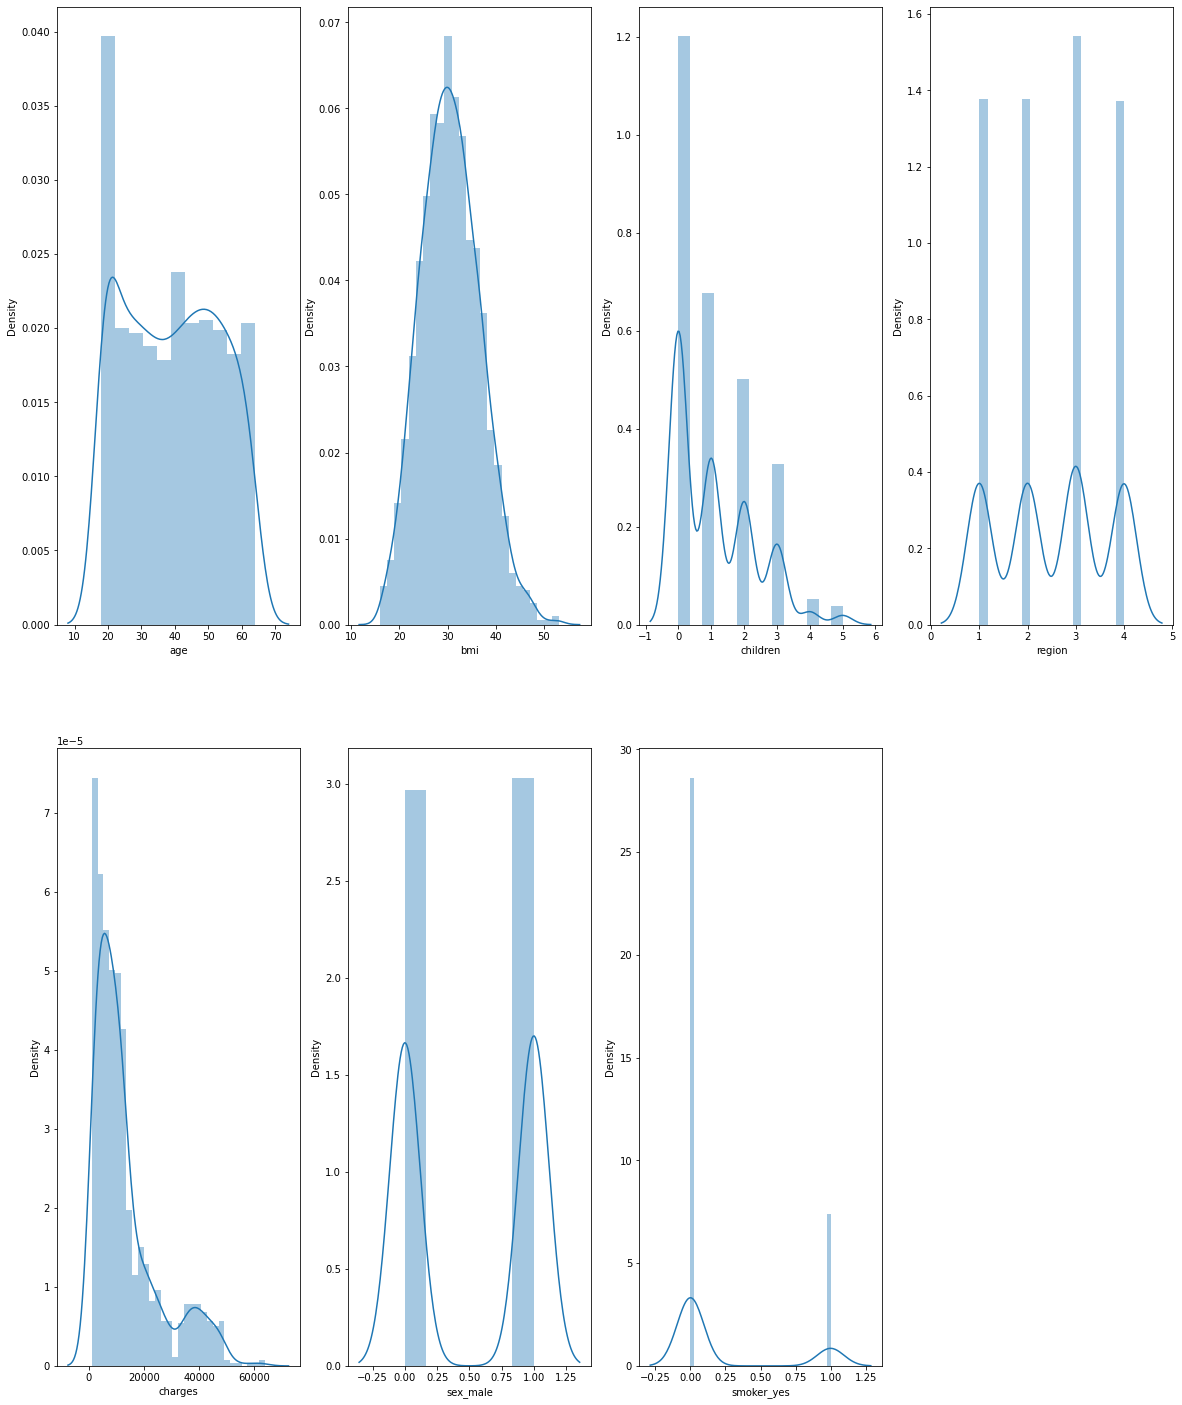

In [15]:
# Let's see how the data is distributed for every column
plt.figure(figsize = (20,25))
plotnumber = 1
for col in data:
    if plotnumber<= 7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize = 10)
    plotnumber +=1
plt.show()    

In [16]:
# In Distribution plot , all columns data is distributed normally,there is no skewness in this dataset 

In [17]:
data.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,1,16884.92400,0,1
1,18,33.770,1,3,1725.55230,1,0
2,28,33.000,3,3,4449.46200,1,0
3,33,22.705,0,2,21984.47061,1,0
4,32,28.880,0,2,3866.85520,1,0


In [18]:
x = data.drop(columns=['charges'])
x.head()

,age,bmi,children,region,sex_male,smoker_yes
0,19,27.900,0,1,0,1
1,18,33.770,1,3,1,0
2,28,33.000,3,3,1,0
3,33,22.705,0,2,1,0
4,32,28.880,0,2,1,0


In [19]:
y = data.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

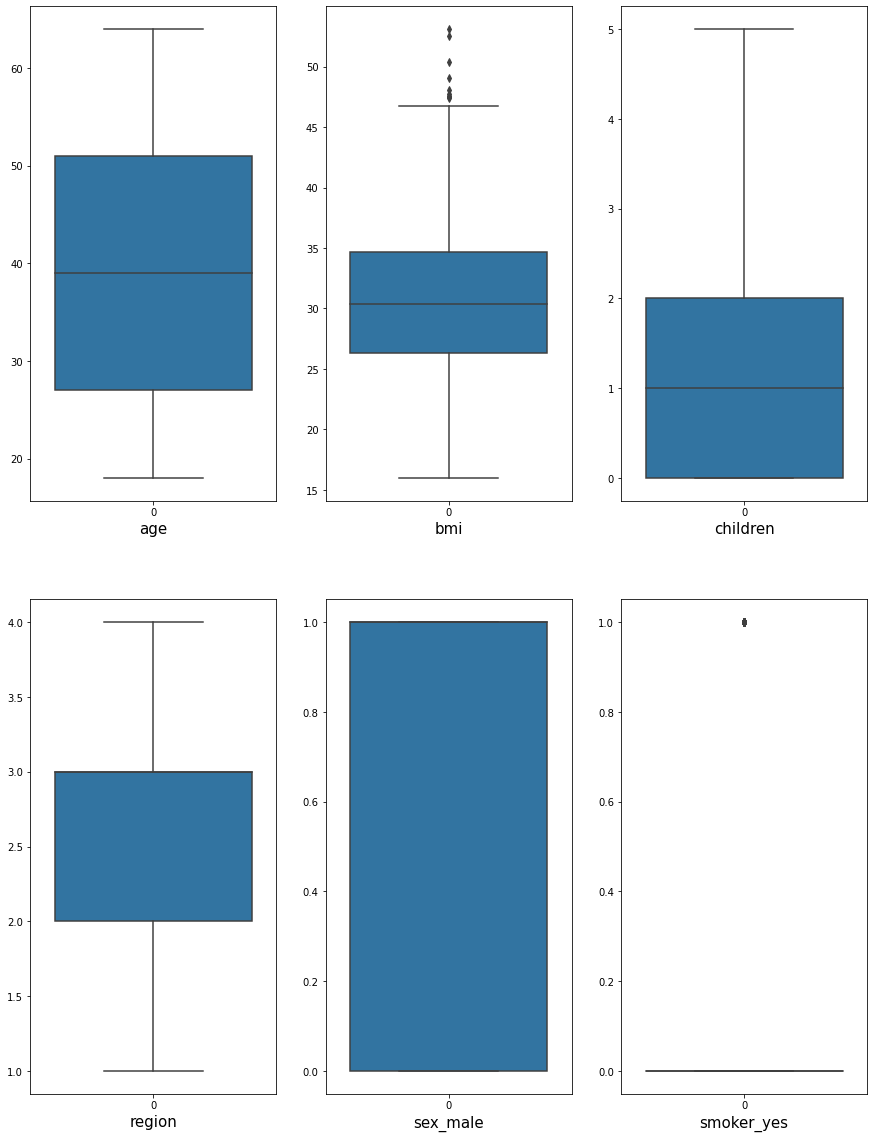

In [20]:
# let's visualize the outliers using boxplot
plt.figure(figsize = (15,20))
pn = 1
for col in x:
    if pn <= 6:
        plt.subplot(2,3,pn)
        ax=sns.boxplot(data = x[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

###As expected BMI is showing outliers on higher side,Lets treat the outliers firs==========
****we are deleting outliers here i have verified from official site of ICMR that maximum mean BMI of average person is 29,hence we are having 53 as maximum value which is not a realistic value****

In [21]:
# Use the quantile techniques
#find the IQR(Inter Quantile Range) to identify the outliers
# 1st Quantile
q1 = data.quantile(0.25)
# 3rd Quantile
q3 = data.quantile(0.75)
# IQR
iqr = q3 - q1
iqr

age              24.000000
bmi               8.397500
children          2.000000
region            1.000000
charges       11899.625365
sex_male          1.000000
smoker_yes        0.000000
dtype: float64

In [22]:
# remove the outliers from BMI
BMI = (q3.bmi + (1.5*iqr.bmi))
BMI


47.290000000000006

In [23]:
# check the index which have higher values
index = np.where(data['bmi']>BMI)
index
# drop the index which we find in the above cell
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,age,bmi,children,region,charges,sex_male,smoker_yes
0,0,19,27.900,0,1,16884.92400,0,1
1,1,18,33.770,1,3,1725.55230,1,0
2,2,28,33.000,3,3,4449.46200,1,0
3,3,33,22.705,0,2,21984.47061,1,0
4,4,32,28.880,0,2,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1324,1333,50,30.970,3,2,10600.54830,1,0
1325,1334,18,31.920,0,4,2205.98080,0,0
1326,1335,18,36.850,0,3,1629.83350,0,0
1327,1336,21,25.800,0,1,2007.94500,0,0


In [24]:
# drop the index which we find in the above cell
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,age,bmi,children,region,charges,sex_male,smoker_yes
0,0,19,27.900,0,1,16884.92400,0,1
1,1,18,33.770,1,3,1725.55230,1,0
2,2,28,33.000,3,3,4449.46200,1,0
3,3,33,22.705,0,2,21984.47061,1,0
4,4,32,28.880,0,2,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1315,1333,50,30.970,3,2,10600.54830,1,0
1316,1334,18,31.920,0,4,2205.98080,0,0
1317,1335,18,36.850,0,3,1629.83350,0,0
1318,1336,21,25.800,0,1,2007.94500,0,0


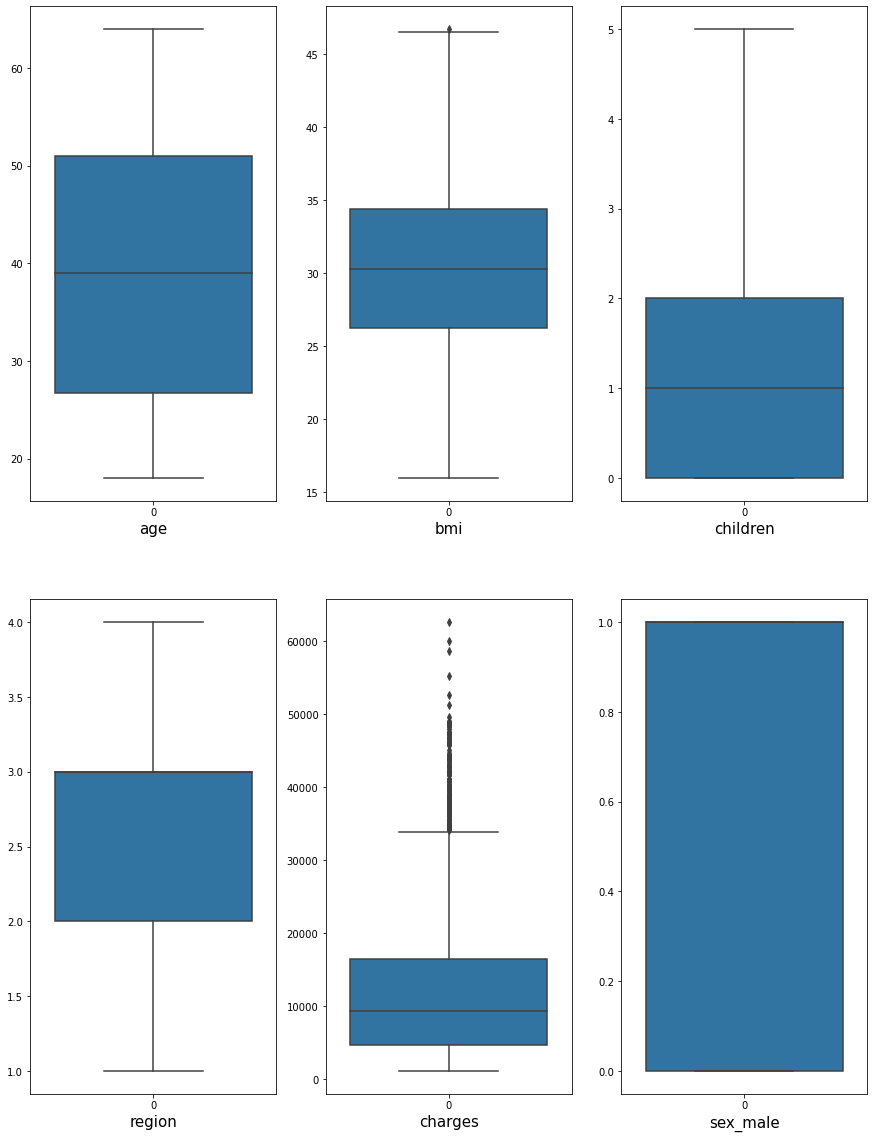

In [25]:
# check the outliers are remove or not
plt.figure(figsize = (15,20))
pn = 1
for col in data:
    if pn <= 6:
        plt.subplot(2,3,pn)
        ax=sns.boxplot(data = data[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

In [26]:
# Data looks much better now outliers removed from bmi column

In [27]:
data.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,1,16884.92400,0,1
1,18,33.770,1,3,1725.55230,1,0
2,28,33.000,3,3,4449.46200,1,0
3,33,22.705,0,2,21984.47061,1,0
4,32,28.880,0,2,3866.85520,1,0


In [28]:
# check the shape
data.shape

(1320, 7)

In [29]:
x = data.drop(columns = ['charges'])
y = data.charges

In [30]:
x.head()

,age,bmi,children,region,sex_male,smoker_yes
0,19,27.900,0,1,0,1
1,18,33.770,1,3,1,0
2,28,33.000,3,3,1,0
3,33,22.705,0,2,1,0
4,32,28.880,0,2,1,0


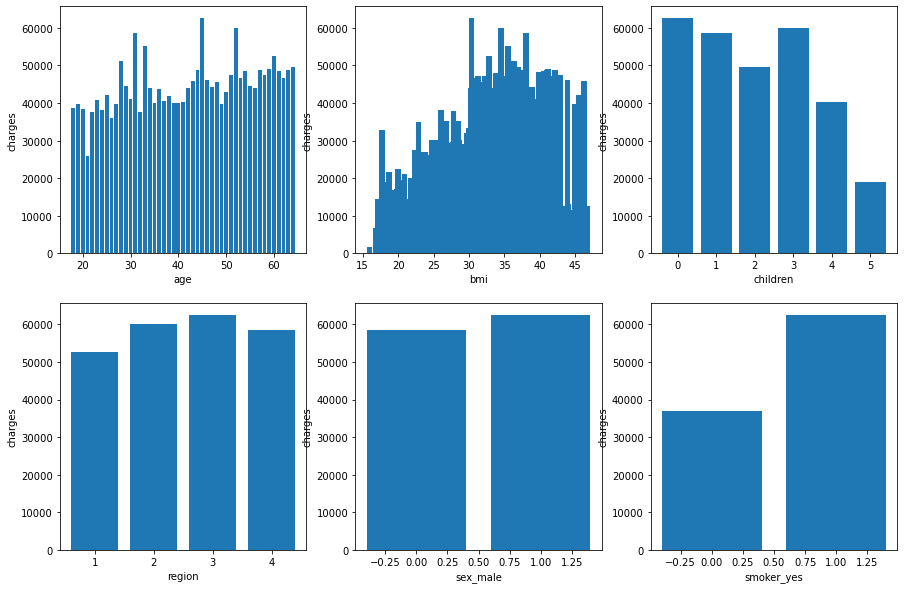

In [31]:
# let's visualize the relationship between label and features
plt.figure(figsize = (15,10))
plotnumber = 1
for col in x:
    if plotnumber <= 6:
        ax = plt.subplot(2,3,plotnumber)
        plt.bar(x[col],y)
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('charges',fontsize = 10)
    plotnumber += 1
plt.show()        

#### Observations-----

1.Charges=> visualization is depicting with less the age less the charges more the age more the charges

2.Sex=> Males are just above the females in term of charges.

3.BMI=> When BMI value is b/w 30-40 the charges are tend to increase

4.Children=> with increase in number of childrens charges are decreasing,this might show chances of multi-collinearity

5.Smoker=> If a person is smoker he/she tends to pay more charges

6.Region=> Regions are showing no big effect regionwise on charges we may delete this feature to save our time

## Lets recheck the observations and Multi-Collinearity by plotting Heat map

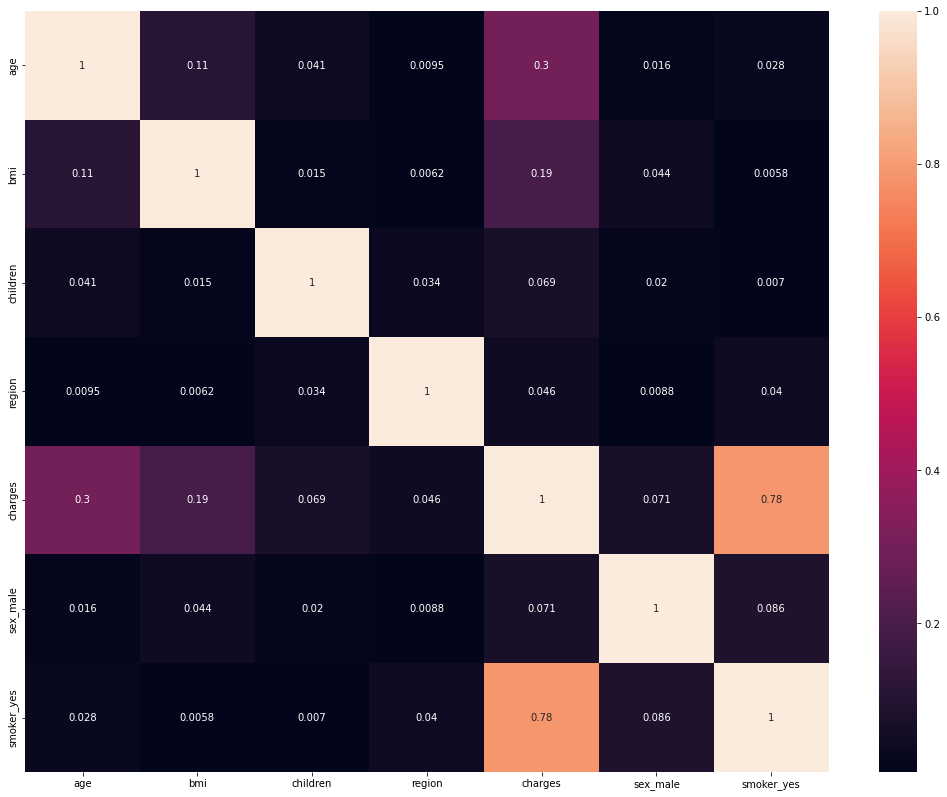

In [32]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True)
plt.show()

### NO Multi-collinearity problem has been visualized

##  Data Standardization and Normalization

In [33]:
# let's standardize the data using standard scaler
# data scaling formula z = (x-mean)/std
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.43798468, -0.44453751, -0.90907953, -1.36494177, -1.01219557,
         1.98590539],
       [-1.50916937,  0.5503341 , -0.08207403,  0.44492577,  0.98795137,
        -0.50354866],
       [-0.79732247,  0.41983135,  1.57193696,  0.44492577,  0.98795137,
        -0.50354866],
       ...,
       [-1.50916937,  1.0723451 , -0.90907953,  0.44492577, -1.01219557,
        -0.50354866],
       [-1.2956153 , -0.8004541 , -0.90907953, -1.36494177, -1.01219557,
        -0.50354866],
       [ 1.55177233, -0.24624112, -0.90907953, -0.460008  , -1.01219557,
         1.98590539]])

## Best Random State

In [34]:
from sklearn.metrics import r2_score

In [35]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,1328):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_train)
    score1 = r2_score(y_train,y_pred)
    pred = lr.predict(x_test)
    score=r2_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('testing score',score,'random state',i)
    



training score 0.7498822779705596 testing score 0.7154909580062426 random state 1
testing score 0.7154909580062426 random state 1
training score 0.7382078185034715 testing score 0.7807876550241071 random state 2
testing score 0.7807876550241071 random state 2
training score 0.741004635660788 testing score 0.7654949542979699 random state 3
training score 0.7653890077866904 testing score 0.6341588537167142 random state 4
training score 0.7448669648103539 testing score 0.7513434839093467 random state 5
training score 0.7465477293994471 testing score 0.7440374174711144 random state 6
training score 0.7494890001228063 testing score 0.7323193196483089 random state 7
training score 0.738458968828926 testing score 0.7729983931104496 random state 8
training score 0.7540478061392284 testing score 0.7038385153459554 random state 9
training score 0.7489450636397943 testing score 0.7359949313292844 random state 10
training score 0.7357220817857335 testing score 0.7815194500961382 random state 11
tr

In [36]:
print('Best accuracy is',max_accu,'on random state',max_rs)

Best accuracy is 0.7807876550241071 on random state 2


## Train Test Split

In [37]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 32)


##  Model training

In [38]:
# creating object for LinearRegression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
# let's check how well model fit on train data
lr.score(x_train,y_train)

0.7316282015415093

In [40]:
# let's check how well model fits on test data
lr.score(x_test,y_test)

0.8045892090978273

In [41]:
# predict the training score
x_pred=lr.predict(x_train)
r2_score(y_train,x_pred)

0.7316282015415093

In [42]:
# predict the model
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.8045892090978273

## we got 74% of score in all above segments,which is a good sign. Lets try LASSO and RIDGE Regressions to check whether model is overfitted or not



In [43]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [44]:
Lassocv=LassoCV(max_iter=200,normalize=True)

### Training with Lasso Regression on Training Data

In [45]:
Lassocv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

#### Taking the alpha number at which model should initiate train

In [46]:
alpha_num = Lassocv.alpha_
alpha_num

2.469266659106107

#### Initiating Lasso Regression with Alpha number

In [47]:
lasso_reg = Lasso(alpha_num)

#### Training using Lasso Regression on Training Data

In [48]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.469266659106107)

In [49]:
# training score
lasso_reg.score(x_train,y_train)

0.7316277350197817

In [50]:
# testing score using Lasso
lasso_reg.score(x_test,y_test)

0.8046036004997967

### In Lasso Regression it is also giving us 74% score,Lets use Ridge Regression to cross verify the result

In [51]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [52]:
alpha_num_ridge=ridgecv.alpha_
alpha_num_ridge

0.001

In [53]:
Ridge_model = Ridge(alpha=alpha_num_ridge)

In [54]:
Ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [55]:
# Model Training score using Ridge Regression
Ridge_model.score(x_train,y_train)

0.7316282015198308

In [56]:
# model testing score using Ridge
Ridge_model.score(x_test,y_test)

0.8045890334952137

#### Lets check overall error of Model using MAE,MSE,RMSE

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_absolute_error(y_test,y_pred)

3766.869720800837

In [59]:
mean_squared_error(y_test,y_pred)

27690414.84911795

In [60]:
##Root mean squared error
np.sqrt(40327983.38802577)

6350.431748159

## Model Building using ADA Boost Regressor


In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
#creating object for AdaBoostRegressor###
ada= AdaBoostRegressor()

In [63]:
# model training
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [64]:
#Predicting values in x_train for comparing with y_train
x_pred= ada.predict(x_train)

In [65]:
# r2 score on training data
r2_score(y_train,x_pred)

0.8199843721376447

In [66]:
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)

In [67]:
###Testing score using Ada Boost Regressor#####
r2_score(y_test,y_pred)

0.8629869107312489

## We have got a good score by using AdaBoostRegressor, Lets try HYPERPARAMETER TUNINGand see if score increases

In [68]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [69]:
AdaBoostRegressor()

AdaBoostRegressor()

In [70]:
###Giving best parameters to Search upon####
params={'n_estimators':[45,50,55,60,70],'learning_rate':[1,2,3,4,5]}

In [71]:
#3Giving RandomizedSearchCV the estimator ,cross validations,param_distribution###
rndn_search = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [72]:
##Model training on Training Data###
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [1, 2, 3, 4, 5],
                                        'n_estimators': [45, 50, 55, 60, 70]})

In [73]:
###Finding the best estimators###
rndn_search.best_estimator_

AdaBoostRegressor(learning_rate=1, n_estimators=60)

In [74]:
ada = AdaBoostRegressor(learning_rate=0.01,n_estimators=70)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=70)

In [75]:
y_predict = ada.predict(x_test)

In [76]:
from sklearn import metrics

In [77]:
print("===========Score post Hyper Parameter Tuning is==========")

metrics.r2_score(y_test,y_predict)

===========Score post Hyper Parameter Tuning is==========


0.9016604896055286

## we got 86% score post HyperParameter  Tuning using RandomizedSearchCV,Lets cross check the same by using GridSearchCV

In [78]:
g_params ={'n_estimators':[30,40,50,60],'learning_rate':[0.25,0.30,0.40,0.70,1]}

In [79]:
grid_search= GridSearchCV(AdaBoostRegressor(),param_grid=g_params)

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.25, 0.3, 0.4, 0.7, 1],
                         'n_estimators': [30, 40, 50, 60]})

In [81]:
grid_search.best_params_

{'learning_rate': 0.7, 'n_estimators': 60}

In [82]:
grid= AdaBoostRegressor(learning_rate=1,n_estimators=60)

In [83]:
y_pred= ada.predict(x_test)

In [84]:
print("=======Testing Score post Hyper Parameter tuning using GridSearchCV=======")
metrics.r2_score(y_test,y_pred)

=======Testing Score post Hyper Parameter tuning using GridSearchCV=======


0.9016604896055286

### We have again got 86% score post HyperParameter tuning using GridSearchCV Lets check MAE,MSE,RSME for this

In [85]:
mean_absolute_error(y_test,y_pred)

2758.3019867589383

In [86]:
mean_squared_error(y_test,y_pred)

13935063.802312179

In [87]:
print("Root mean squared error===",np.sqrt(24259598.86106933))

Root mean squared error=== 4925.40342114931


## Model building using KNN Regressor

In [88]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor

In [89]:
# creating object for knn algorithm
knn = KNeighborsRegressor()

In [90]:
# model training
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [91]:
y_pred = knn.predict(x_test)
r2_score(y_test,y_pred)

0.14610593248765136

In [92]:
print("Training score without Hyperparameter tuning is====",knn.score(x_train,y_train))

Training score without Hyperparameter tuning is==== 0.424171691308585


In [93]:
print("Testing score without Hyperparameter Tuning is =====",knn.score(x_test,y_test))

Testing score without Hyperparameter Tuning is ===== 0.14610593248765136


###  I am not satisfied with KNN score

### Hyperparameter Tuning

In [94]:
params= {'algorithm':['ball_tree', 'kd_tree', 'brute'],
                      'leaf_size':[20,30,40,50],
                      'n_neighbors':[3,5,7,9,11,13]}

In [95]:
grid_knn = GridSearchCV(estimator=knn,param_grid=params)

In [96]:
grid_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [97]:
grid_knn.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 7}

In [98]:
knn = KNeighborsRegressor(algorithm='ball_tree',leaf_size=20,n_neighbors=7)

In [99]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=7)

In [100]:
y_pred = knn.predict(x_test)

In [101]:
print("Score Post Hyperparameter Tuning is======",metrics.r2_score(y_test,y_pred))

Score Post Hyperparameter Tuning is====== 0.1754680151081599


## Calculating MAE,MSE,RSME for KNN algorithm

In [102]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))

Mean Absolute Error is===== 7631.350190886905


In [103]:
print("Mean squared error is======",mean_squared_error(y_test,y_pred))

Mean squared error is====== 116839160.27673092


In [104]:
print("Root mean squared error===",np.sqrt(30113912.71130414))

Root mean squared error=== 5487.614482751512


## Model building using Gradient Boosting Regressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gbr = GradientBoostingRegressor()

In [107]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [108]:
print("Training score without hyperparameter tuning is======",gbr.score(x_train,y_train))

Training score without hyperparameter tuning is====== 0.8898193852008458


In [109]:
y_predict = gbr.predict(x_test)

In [110]:
print("Testing score without Hyperparameter Tuning is",metrics.r2_score(y_test,y_predict))

Testing score without Hyperparameter Tuning is 0.9105596274422689


### Hyperparameter Tuning

In [111]:
params={'min_samples_split':[2,3,4],
       'min_samples_leaf':[2,3,4],
       'max_depth':[2,3,4],
       'learning_rate':[0.1,0.2,0.3]}

In [112]:
rndn_search = RandomizedSearchCV(GradientBoostingRegressor(),cv=5,param_distributions=params)

In [113]:
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4]})

In [114]:
rndn_search.best_estimator_

GradientBoostingRegressor(max_depth=2, min_samples_leaf=4, min_samples_split=3)

In [115]:
gbr=GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_leaf=3,min_samples_split=4)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=4)

In [116]:
y_predict=gbr.predict(x_test)

In [117]:
print("Score Post Hyperparameter Tuning is========",metrics.r2_score(y_test,y_predict))

Score Post Hyperparameter Tuning is======== 0.9198138262993288


In [118]:
##Printing all evaluation score for GradientBoostingRegressor####
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_predict))
print("Mean squared error is======",mean_squared_error(y_test,y_predict))
print("Root mean squared error===",np.sqrt(23643030.57464481))

Mean Absolute Error is===== 2133.5836182606927
Mean squared error is====== 11362670.427175106
Root mean squared error=== 4862.409955427947


##  Model building using Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
# initiate the object for random forest
rf = RandomForestRegressor()

In [121]:
# model training
rf.fit(x_train,y_train)

RandomForestRegressor()

In [122]:
print("Training score without hyperparameter tuning is======",rf.score(x_train,y_train))

Training score without hyperparameter tuning is====== 0.9729727501250004


In [123]:
pred = rf.predict(x_test)
print("testing score without hyperparameter tuning is======",r2_score(y_test,pred))

testing score without hyperparameter tuning is====== 0.8819530992522684


##### We got 85% by using RandomForestRegressor

##  Save the final model

In [124]:
# as per my observation LinearRegression is best for this dataset 

In [125]:
import joblib

In [126]:
joblib.dump(lr,'Medical_Cost.pkl')

['Medical_Cost.pkl']